# ***Google Playstore Apps analysis*** 

Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. Today we will be analysing various applications available on Google Playstore. The dataset is downloaded from `kaggle.com`

Link to download the dataset: https://www.kaggle.com/lava18/google-play-store-apps

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14

The special command `%matplotlib inline` will make sure that our plots are shown and embedded in the Jupyter notebook itself rather than showing up in pop-up windows.

## Downloading and Loading the Dataset

The source of data is a CSV file named `googleplaystore.csv`

Once we have downloaded the dataset from link given above, we need to move the csv file to the same directory where the Jupyter notebook is running.

In [2]:
# Load dataset into a dataframe
playstore_raw_df = pd.read_csv('googleplaystore.csv')

## Data Preparation and Cleaning

As the data will have lot of inconsistencies like missing data or null values or invalid data we need to handle them by performing some cleaning operations so that we can bring this raw data into our use.

In [3]:
type(playstore_raw_df)

pandas.core.frame.DataFrame

In [4]:
# To check data from top rows
playstore_raw_df.head(6)   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [5]:
# Check data from bottom rows
playstore_raw_df.tail(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Check total number of rows & columns from dataframe
playstore_raw_df.shape

(10841, 13)

Our dataset contains 10841 rows and 13 columns.

***Now we will check some samples of the dataset to get an overall idea for range of values in the dataset.***

In [7]:
playstore_raw_df.sample(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9371,EH Autolink,BUSINESS,NaN,1,921k,100+,Free,0,Everyone,Business,"March 11, 2016",1.0,3.0 and up
10774,Miss FQ,NEWS_AND_MAGAZINES,NaN,0,36M,10+,Free,0,Everyone,News & Magazines,"April 5, 2018",3.8,4.4 and up
1067,UBA Mobile Banking,FINANCE,4.3,12185,Varies with device,"1,000,000+",Free,0,Everyone,Finance,"June 8, 2018",Varies with device,Varies with device
3428,Koi Free Live Wallpaper,PERSONALIZATION,4.2,290241,4.1M,"50,000,000+",Free,0,Everyone,Personalization,"June 24, 2014",1.9,2.1 and up
3271,HTC Sense Input,TOOLS,3.4,17030,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"May 12, 2017",Varies with device,Varies with device
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up


In [8]:
# Check basic statistics of the data
playstore_raw_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# Check the columns present in the rows and datatypes
playstore_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# Check the number of null values in each column.
playstore_raw_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we can see there are 1474 null values in `Rating column`, 1 null value in `Type` and `Content Rating` column, 8 null values in `Current Ver` column and 3 null values in `Android Ver` column.

***Let us check the outliers present if any. Outliers are basically observations which are completely different from other observations. Outliers can change the result of the analysis.***

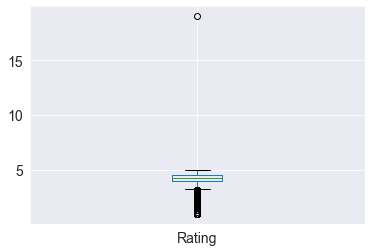

In [11]:
playstore_raw_df.boxplot();

As we can see above is boxplot of `Rating` column where the green line indicates the average ratings given by users to apps which is around 4.5

The small circle above 17.5 indicates there is outlier present in this column. We know that the ratings on Playstore for apps can never be more than 5. So now we will have to check the number outliers present in this column. In this case all the values above 5 in the `Rating` column will be considered as outliers.

**Note**: Boxplot will give us the plot only for columns where the datatype is `float`.

In [12]:
playstore_raw_df[playstore_raw_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we can see we have one App where the rating is 19 which is an outlier.

In [13]:
# Drop the row
playstore_raw_df.drop([10472], inplace=True)

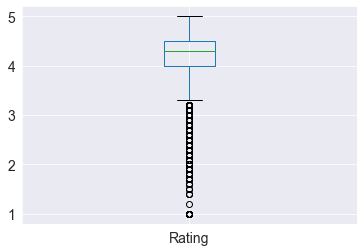

In [14]:
playstore_raw_df.boxplot();

As we can see now that once the oulier is removed we get the following boxplot for `Rating` column.

***Let us remove columns where 90% of the data is empty as they will be of no use for our analysis.***

In [15]:
threshold = len(playstore_raw_df) * 0.10
threshold

1084.0

In [16]:
playstore_raw_df.dropna(thresh=threshold, axis=1, inplace=True)

***Lets us replace the null values in the numerical columns with median and null values in categorical columns with mode.*** 

In [17]:
def median(series):
    return series.fillna(series.median())

In [18]:
playstore_raw_df.Rating = playstore_raw_df['Rating'].transform(median)

So now we have filled all the null values in the `Rating` column with median values. Now let us move on to the categorical columns.

In [19]:
# Check Mode of categorical columns
print(playstore_raw_df['Type'].mode())
print(playstore_raw_df['Current Ver'].mode())
print(playstore_raw_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


We will fill missing categorical column values with mode.

In [20]:
playstore_raw_df['Type'].fillna(str(playstore_raw_df['Type'].mode().values[0]), inplace=True)
playstore_raw_df['Current Ver'].fillna(str(playstore_raw_df['Current Ver'].mode().values[0]), inplace=True)
playstore_raw_df['Android Ver'].fillna(str(playstore_raw_df['Android Ver'].mode().values[0]), inplace=True)

In [21]:
# Convert Price, Reviews and Rating column into numerical datatype
playstore_raw_df['Price'] = playstore_raw_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
playstore_raw_df['Price'] = playstore_raw_df['Price'].apply(lambda x: float(x))

playstore_raw_df['Reviews'] = pd.to_numeric(playstore_raw_df['Reviews'], errors='coerce')

playstore_raw_df['Installs'] = playstore_raw_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_raw_df['Installs'] = playstore_raw_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
playstore_raw_df['Installs'] = playstore_raw_df['Installs'].apply(lambda x: float(x))

In the above cell we have used `lambda` function which acts like a regular python function but without any name. `lambda` functions are used when we want to use a function for a short period of time.

***We will also have to check if our dataset contains duplicate rows for same apps.***

In [22]:
playstore_raw_df.App.duplicated().any()

True

In [23]:
playstore_raw_df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
8 Ball Pool                                           7
Candy Crush Saga                                      7
                                                     ..
Lite Messenger for Facebook Lite                      1
Bi-Tank Ads Free                                      1
Signal Spy - Monitor Signal Strength & Data Usage     1
Battery Doctor-Battery Life Saver & Battery Cooler    1
FP BW LCD View                                        1
Name: App, Length: 9659, dtype: int64

In [24]:
playstore_raw_df[playstore_raw_df.App=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


As we can see all the columns of `ROBLOX` has been repeated many times. So we will keep the row with highest number of `Reviews` and drop the remaining rows.

In [25]:
playstore_raw_df.drop_duplicates(subset=['App'], inplace=True)

In [26]:
playstore_raw_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Exploratory Analysis and Visualization

Now we will create visualization of the data we have cleaned to get a clear understanding of the same.

In [27]:
grp = playstore_raw_df.groupby('Category')
x = grp.Rating.agg(np.mean)
y = grp.Price.agg(np.sum)
z = grp.Reviews.agg(np.mean)

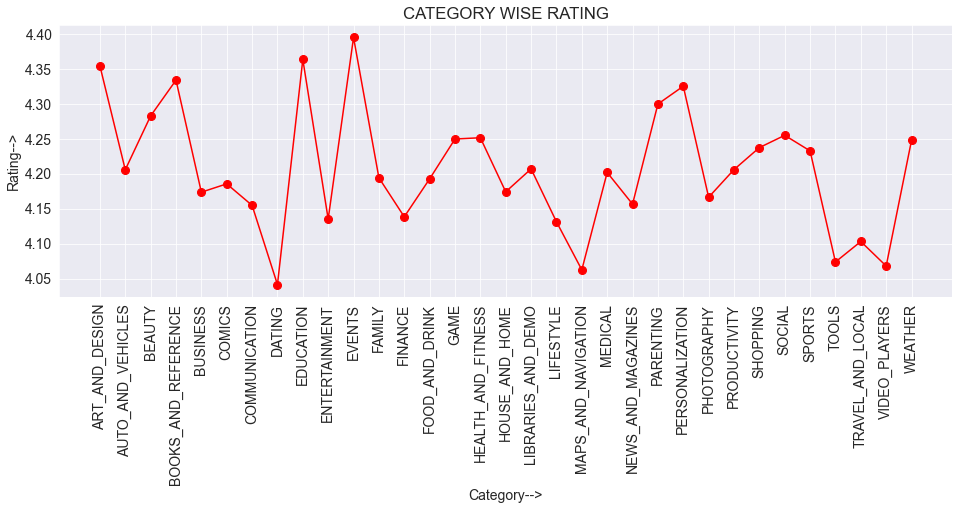

In [28]:
plt.figure(figsize=(16,5))
plt.plot(x,'r-o', markersize=8)
plt.xticks(rotation=90)
plt.title('CATEGORY WISE RATING')
plt.xlabel('Category-->')
plt.ylabel('Rating-->');

`Events`, `Education` and `Art and Design` has highest number of ratings.

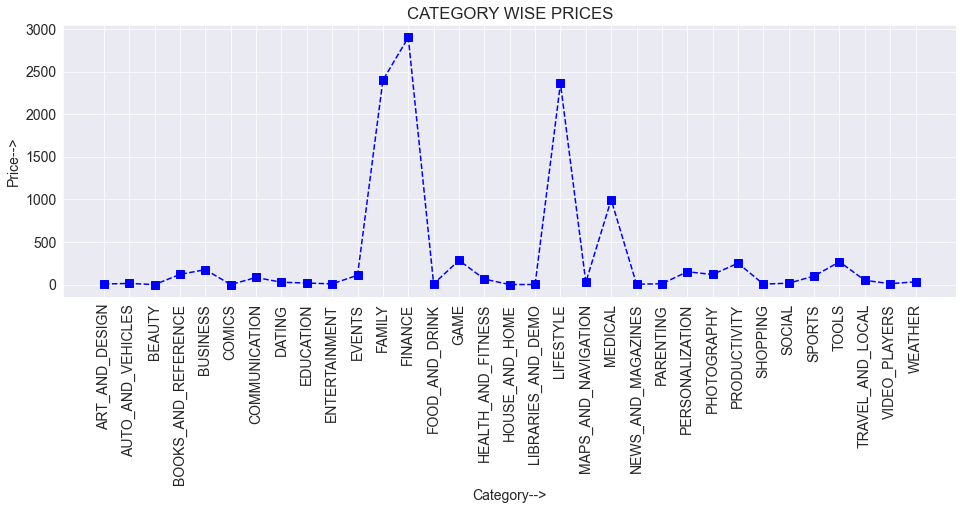

In [29]:
plt.figure(figsize=(16,5))
plt.plot(y, 'b--s', markersize=8)
plt.xticks(rotation=90)
plt.title('CATEGORY WISE PRICES')
plt.xlabel('Category-->')
plt.ylabel('Price-->');

As we can see the App Category with highest price is `Finance` followed by `Family` and `Lifestyle`

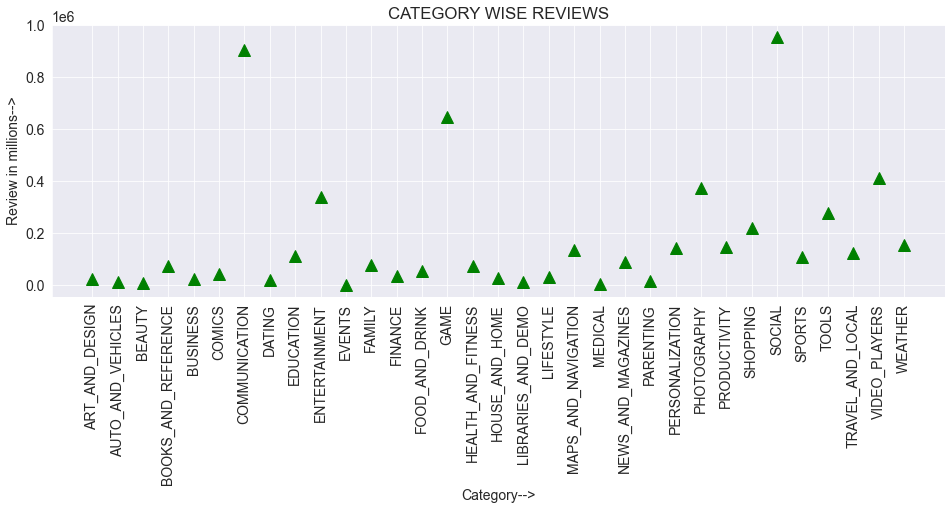

In [30]:
plt.figure(figsize=(16,5))
plt.plot(z, '^g', markersize=12)
plt.xticks(rotation=90)
plt.title('CATEGORY WISE REVIEWS')
plt.xlabel('Category-->')
plt.ylabel('Review in millions-->');

The highest number of reviews is for `Social` category followed by `Communication` and `Game`

## Asking and Answering Questions

#### Q1: Which is the minimum Android version is required to run maximum number of the applications?

In [31]:
min_android_df = playstore_raw_df['Android Ver'].value_counts().head(10)

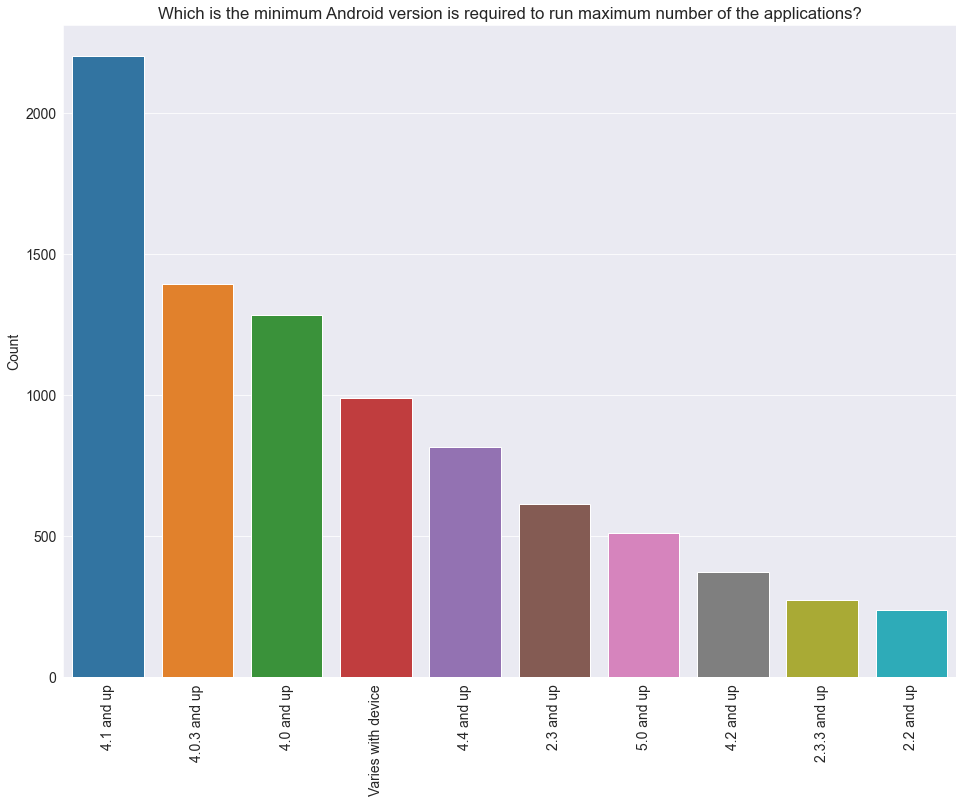

In [32]:
plt.figure(figsize=(16,12))
plt.title('Which is the minimum Android version is required to run maximum number of the applications?')
plt.xticks(rotation=90)
sns.barplot(x=min_android_df.index, y=min_android_df)
plt.ylabel('Count');

If the user has a device with Android version `4.1 and above`, then he will be able to run maximum number of the Apps ie `2204`.

#### Q2: Which are the top 3 Genres of Apps with highest ratings? 

In [33]:
playstore_raw_df.groupby('Genres')[['Rating']].mean().sort_values('Rating',ascending=False).head(3)

,Rating
Genres,
Board;Pretend Play,4.8
Comics;Creativity,4.8
Health & Fitness;Education,4.7


The Top 3 genres with highest `ratings` are `Board-Pretend Play`,`Comics-Creatvity` and `Health,Fitness & Education` at `4.8`, `4.8` and `4.7`

#### Q3: Which are top 5 Apps with has highest number of reviews?

In [34]:
high_reviews_df = playstore_raw_df.sort_values('Reviews', ascending=False).head()

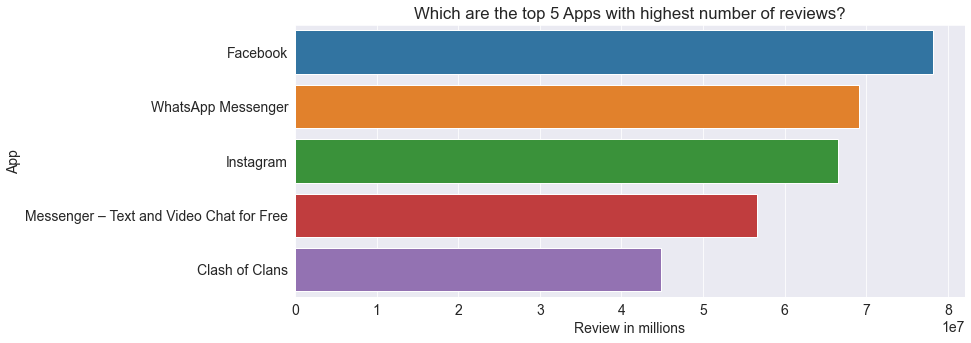

In [35]:
plt.figure(figsize=(12,5))
plt.title('Which are the top 5 Apps with highest number of reviews?')
sns.barplot(x=high_reviews_df.Reviews, y=high_reviews_df.App)
plt.xlabel('Review in millions');

As we can see `Facebook` has highest number of reviews at `7,81,58,306`. This is then followed by `Whatsapp Messenger` and `Instagram`. 

#### Q4: Which Category has highest number of Apps?

In [36]:
top_category_df = playstore_raw_df.Category.value_counts()

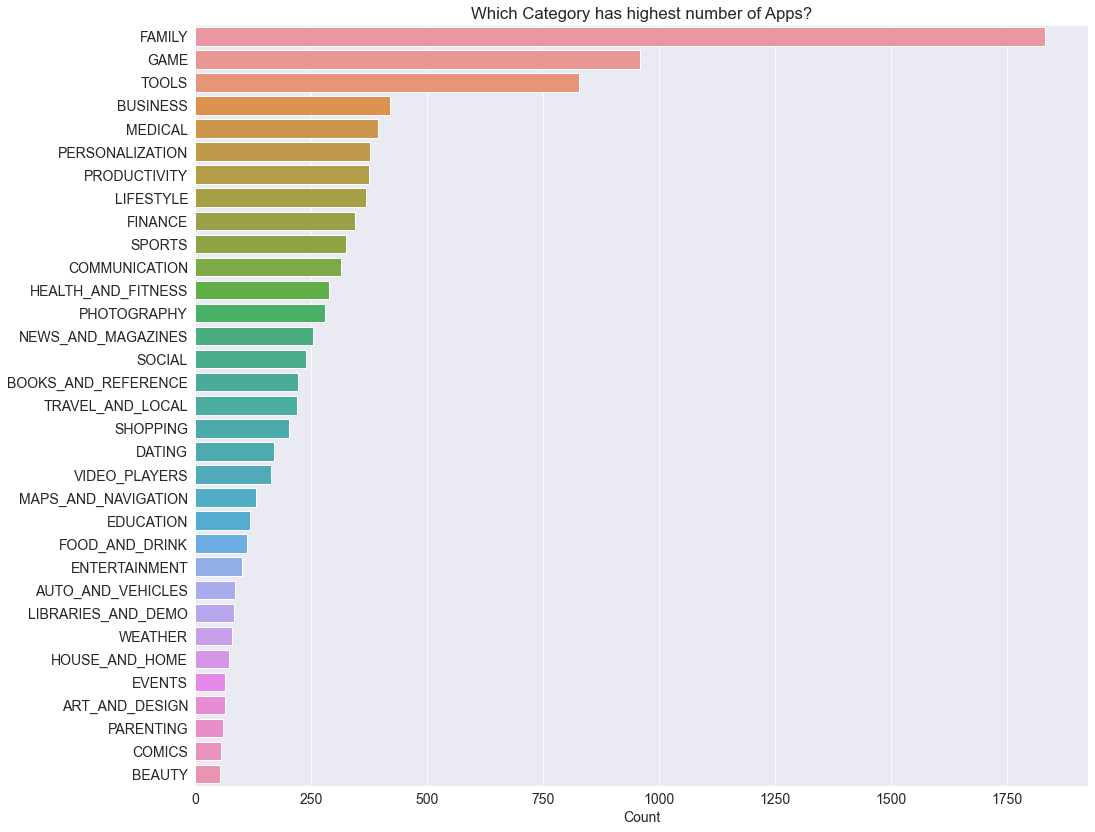

In [37]:
plt.figure(figsize=(16,14))
plt.title('Which Category has highest number of Apps?')
sns.barplot(x=top_category_df, y=top_category_df.index)
plt.xlabel('Count');

As we can see, `Family` category has highest number of Apps which is `1832`. This is followed by `Games` and `Tools` having `959` and `827` Apps. `Education`, `Art and Design` and `Events` are in the bottom 12 in this case but still they have highest number of ratings. 

#### Q5: In what range is the maximum number of ratings?

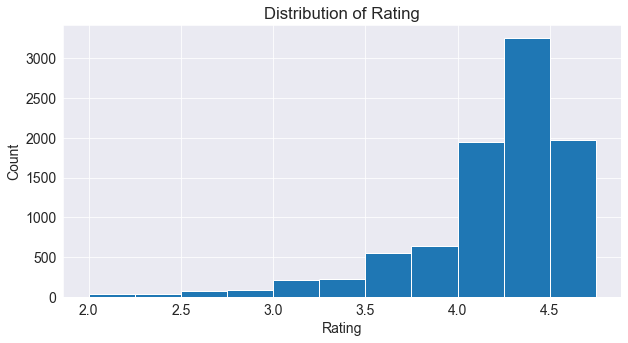

In [38]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.hist(playstore_raw_df.Rating, bins=np.arange(2,5,0.25));

 As we can see most of the ratings lie betweeen range of `4` to `5`. Further `4.25` to `4.5` range has maximum number of ratings.  